## This notebook shows various functions for S6+ corrections

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySCSS as ss
pd.options.display.max_columns = None

In [2]:
## Lets use the Fortin SCSS as an example
df=ss.import_data('Fortin_2015.xlsx', sheet_name="PySCSS")
SCSS_F=ss.calculate_Fortin2015_SCSS(df, T_K=df['T_K'], P_kbar=df['P_kbar'])


We have replaced all missing liquid oxides and strings with zeros. 


### First, lets calculate Fe3Fet_Liq at QFM

In [3]:
Fe3Fet_Liq=ss.convert_fo2_to_fe_partition(liq_comps=df, T_K=df['T_K'], P_kbar=df['P_kbar'],
                                 fo2="QFM", renorm=False, fo2_offset=0).get('Fe3Fet_Liq')

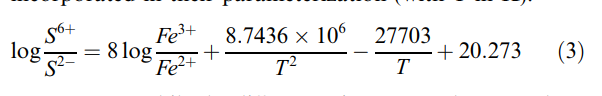

### Lets calculate s6ST using Jugo et al. (2010)

In [9]:
s6St_Jugo=ss.calculate_S6St_Jugo2010(DeltaQFM=0)
s6St_Jugo

0.007880683850330283

### Lets calculate S6ST using Nash

In [21]:
s6St_Nash=ss.calculate_S6St_Nash2019(T_K=df['T_K'], Fe3Fet_Liq=Fe3Fet_Liq)
s6St_Nash.head()

0    0.143623
1    0.131358
2    0.120457
3    0.148741
4    0.102185
dtype: float64

### Lets calculate SCSS_Tot for each of these

In [15]:
SCSS_F_Tot_Nash=ss.calculate_SCSS_Total(SCSS=SCSS_F['SCSS_ppm_Fortin2015'], 
                                        S6St_Liq=s6St_Nash)
SCSS_F_Tot_Jugo=ss.calculate_SCSS_Total(SCSS=SCSS_F['SCSS_ppm_Fortin2015'],
                                        S6St_Liq=s6St_Jugo)

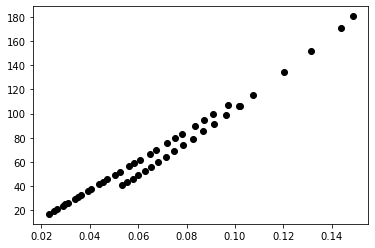

In [22]:
plt.plot(s6St_Nash, SCSS_F_Tot_Jugo- SCSS_F_Tot_Nash, 'ok')